<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [16]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [18]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [19]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [21]:
import matplotlib.pyplot as plt

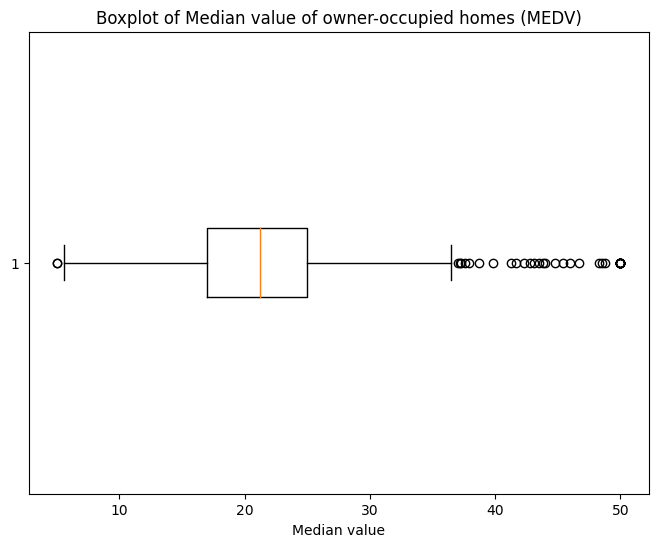

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('Median value')
plt.show()

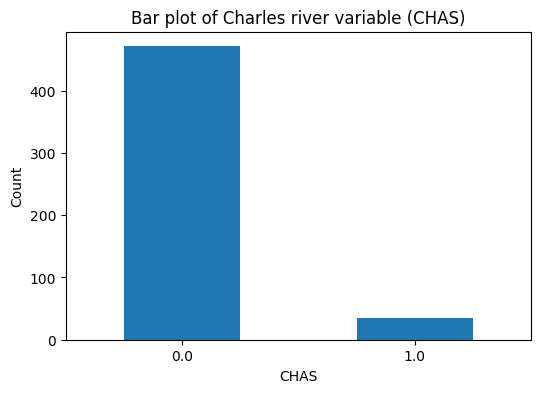

In [22]:
plt.figure(figsize=(6, 4))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar plot of Charles river variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [25]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

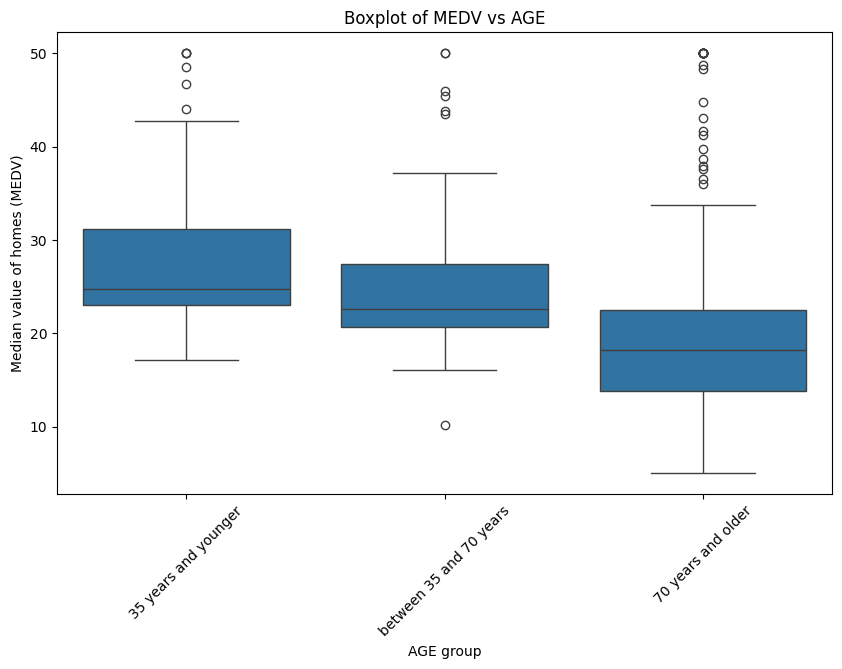

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('AGE group')
plt.ylabel('Median value of homes (MEDV)')
plt.xticks(rotation=45)
plt.show()

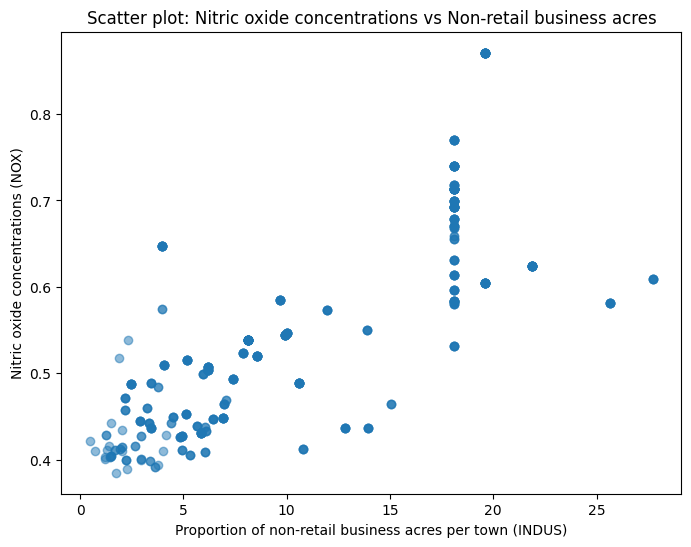

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
plt.title('Scatter plot: Nitric oxide concentrations vs Non-retail business acres')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxide concentrations (NOX)')
plt.show()

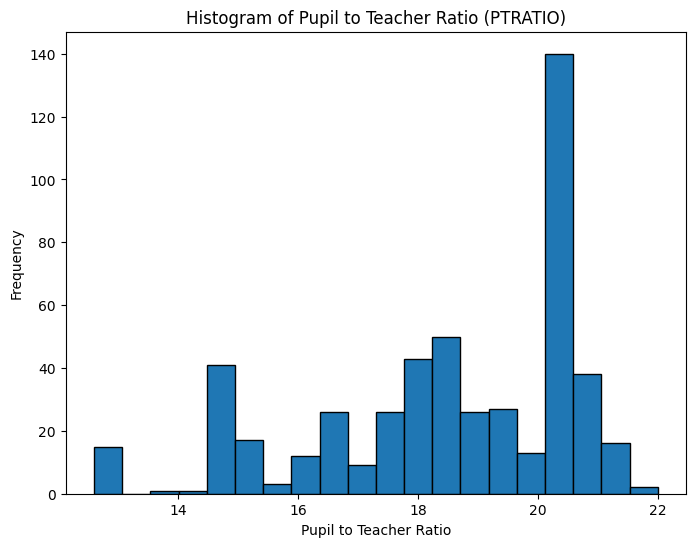

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [31]:
from scipy import stats


In [32]:
medv_chas_1 =boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [33]:
t_statistic, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

In [34]:
print(f"T-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a significant difference in median house values between houses bounded and not bounded by the Charles river.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in median house values between houses bounded and not bounded by the Charles river.")

T-test results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis.
There is a significant difference in median house values between houses bounded and not bounded by the Charles river.


In [36]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MEDV ~ AGE_group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print("ANOVA results:")
print(anova_table)

# Conclusion based on p-value
alpha = 0.05
p_value = anova_table['PR(>F)'][0]  # p-value for AGE_group

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a significant difference in median house values among different age groups of owner-occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference in median house values among different age groups of owner-occupied units built prior to 1940.")

ANOVA results:
                 sum_sq     df         F        PR(>F)
AGE_group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
Conclusion: Reject the null hypothesis.
There is a significant difference in median house values among different age groups of owner-occupied units built prior to 1940.


In [39]:
corr_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [40]:
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


In [41]:
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Conclusion: Reject the null hypothesis.
There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [42]:
import statsmodels.api as sm

In [43]:
X = boston_df['DIS']  # independent variable
y = boston_df['MEDV']  # dependent variable

In [44]:
X = sm.add_constant(X)

In [45]:
model = sm.OLS(y, X).fit()

In [46]:
print("Regression results:")
print(model.summary())


Regression results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        22:19:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817

In [47]:
p_value = model.pvalues['DIS']

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a significant impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no significant impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")


Conclusion: Reject the null hypothesis.
There is a significant impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
